In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
# Define the spatial domain
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# Define the function to animate. Replace this with your function u(t, x, y).
def u(t, X, Y):
    return np.sin(X + t) * np.cos(Y - t)

# Plotting Functions

I made three functions that can plot:
- Using `ax.imshow`.
- Using `ax.contour`.
- Using `ax.contour` in a deprecated way. But the code failed when i shoved it into a function. Weird.

In [3]:
def animate_im():
    # Initialize the figure and axes
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim((x.min(), x.max()))
    ax.set_ylim((y.min(), y.max()))

    # Initial plot with imshow
    img = ax.imshow(u(0, X, Y), extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', aspect='auto')

    # Update function for animation
    def update(frame):
        img.set_data(u(frame, X, Y))
        img.set_clim(u(frame, X, Y).min(), u(frame, X, Y).max())

    # Create animation
    ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128), blit=False);

    # To display the animation in the notebook
    return HTML(ani.to_html5_video())

def animate_contour():
    # Initialize the figure and axes
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim((x.min(), x.max()))
    ax.set_ylim((y.min(), y.max()))

    # Initial plot (not strictly necessary to keep as a variable now)
    ax.contourf(X, Y, u(0, X, Y))

    # Update function for animation
    def update(frame):
        ax.clear()  # Clear previous contours
        ax.contourf(X, Y, u(frame, X, Y))  # Redraw contours
        ax.set_xlim((x.min(), x.max()))  # Reset the x and y limits
        ax.set_ylim((y.min(), y.max()))

    # Create animation
    ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128), blit=False)

    # To display the animation in the notebook
    return HTML(ani.to_html5_video())


# This doesn't work for some reason.
# def animate_contour_deprecated():
#     # Initialize the figure and axes
#     fig, ax = plt.subplots(figsize=(5, 5))
#     ax.set_xlim((x.min(), x.max()))
#     ax.set_ylim((y.min(), y.max()))

#     # Initial plot
#     contour = ax.contourf(X, Y, u(0, X, Y))

#     # Update function for animation
#     def update(frame):
#         global contour
#         for c in contour.collections:
#             c.remove()
#         contour = ax.contourf(X, Y, u(frame, X, Y))

#     # Create animation
#     ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128), blit=False)

#     # To display the animation in the notebook
#     return HTML(ani.to_html5_video())





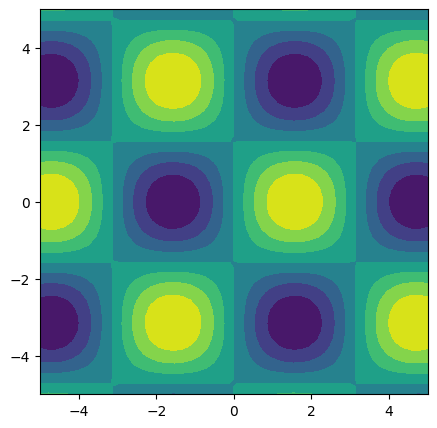

In [4]:
animate_contour()

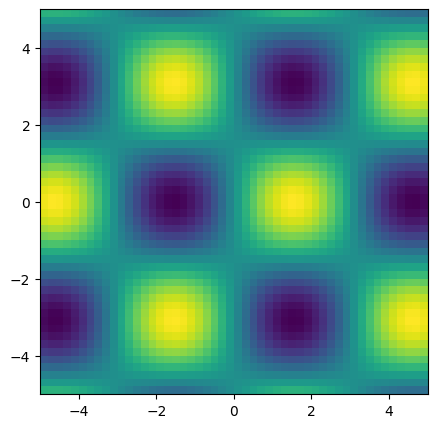

In [5]:
animate_im()